In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [401]:
csv_path = 'D:\\data analyst\\datacleaning\\retail store\\retail_store_sales.csv'

df = pd.read_csv(csv_path)


In [402]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

df = df.sort_values(by='Transaction Date', ascending=True)

In [403]:
df_1 = df.copy()

Drop NaN

In [404]:
df_1 = df_1.dropna(subset= ['Item','Price Per Unit'])
df_1.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    3783
dtype: int64

Replace NaN with False in 'Discount Applied

In [405]:
df_1['Discount Applied'] = df_1['Discount Applied'].replace(np.nan, False)

C:\Users\aungh\AppData\Local\Temp\ipykernel_6104\997094150.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['Discount Applied'] = df_1['Discount Applied'].replace(np.nan, False)


In [406]:
df_1.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
4056,TXN_2070726,CUST_22,Milk Products,Item_6_MILK,12.5,5.0,62.5,Digital Wallet,In-store,2022-01-01,False
3493,TXN_1519499,CUST_15,Computers and electric accessories,Item_6_CEA,12.5,6.0,75.0,Credit Card,Online,2022-01-01,False
5168,TXN_9364474,CUST_19,Food,Item_22_FOOD,36.5,3.0,109.5,Cash,In-store,2022-01-01,False
3327,TXN_6950467,CUST_01,Computers and electric accessories,Item_6_CEA,12.5,6.0,75.0,Digital Wallet,In-store,2022-01-01,True
5790,TXN_6329331,CUST_24,Beverages,Item_8_BEV,15.5,5.0,77.5,Credit Card,Online,2022-01-01,True


Payment Type

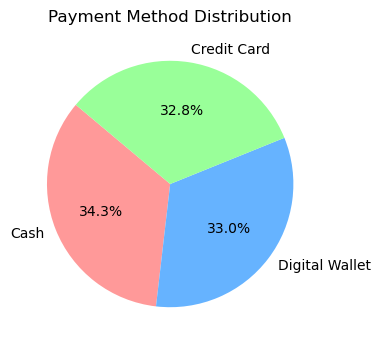

In [407]:
payment_counts = df["Payment Method"].value_counts()

# Plot Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=140, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Payment Method Distribution")
plt.show()

In [408]:
df_1['Customer ID'].value_counts()

Customer ID
CUST_05    497
CUST_13    491
CUST_24    489
CUST_08    480
CUST_15    478
CUST_16    469
CUST_09    465
CUST_01    461
CUST_10    458
CUST_20    457
CUST_22    456
CUST_11    453
CUST_12    452
CUST_23    450
CUST_02    447
CUST_18    447
CUST_14    447
CUST_21    447
CUST_06    443
CUST_25    438
CUST_07    433
CUST_19    431
CUST_04    428
CUST_03    423
CUST_17    422
Name: count, dtype: int64

Total spending by customers

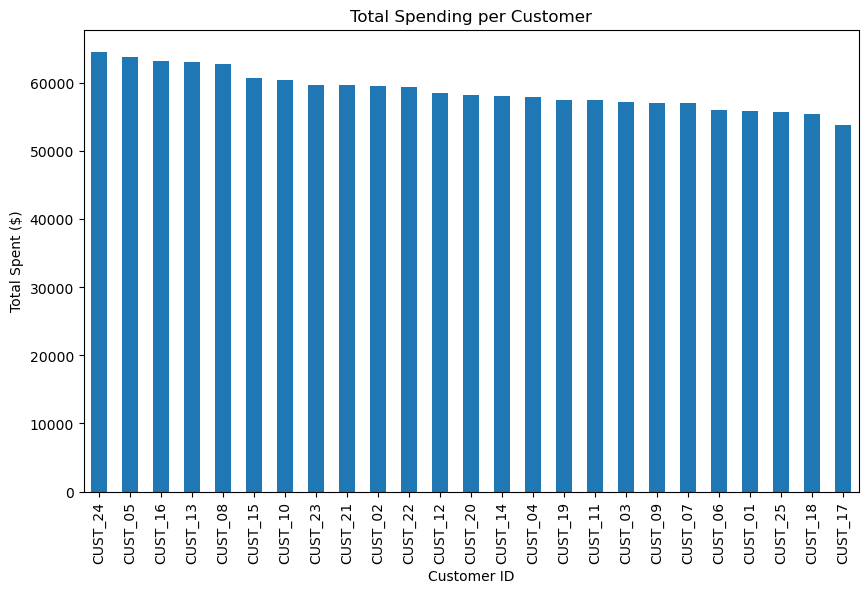

In [409]:
total_spending_by_cust = df_1.groupby(['Customer ID'])['Total Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_spending_by_cust.plot(kind='bar')

plt.ylabel("Total Spent ($)")
plt.xlabel("Customer ID")
plt.title("Total Spending per Customer")
plt.show()


Most purchased categories

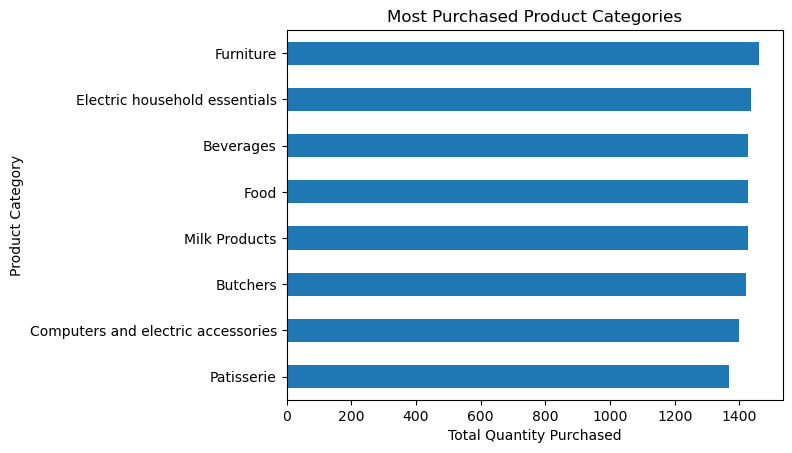

In [410]:
Most_purchased_categories = df_1['Category'].value_counts().sort_values(ascending=True)

Most_purchased_categories.plot(kind='barh')

plt.xlabel("Total Quantity Purchased")
plt.ylabel("Product Category")
plt.title("Most Purchased Product Categories")
plt.show()

Payment Method Trends

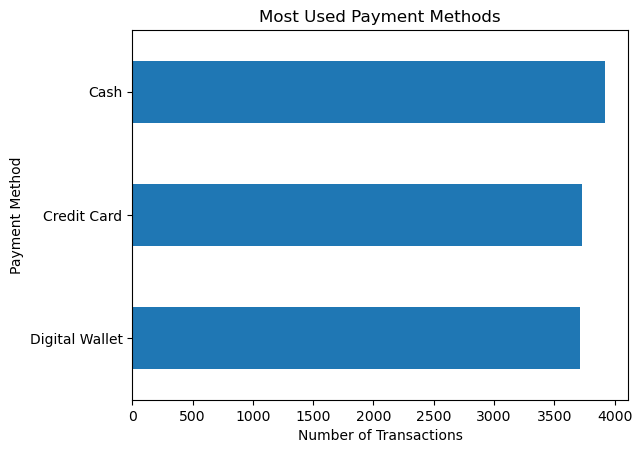

In [411]:
payments_trends = df_1['Payment Method'].value_counts().sort_values(ascending=True)

payments_trends.plot(kind='barh')
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Method")
plt.title("Most Used Payment Methods")
plt.show()

Payment method vs. category preference

<Figure size 1200x700 with 0 Axes>

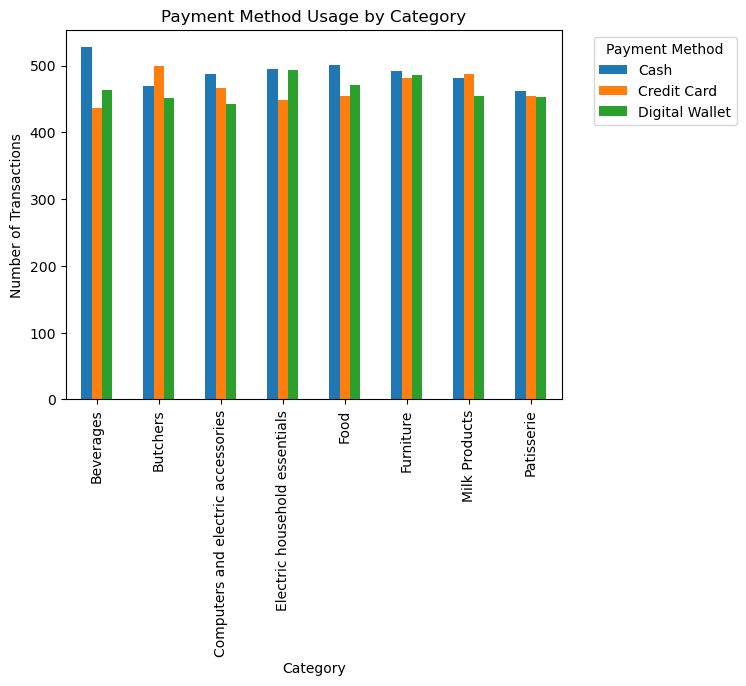

In [412]:
Payments_category = df_1.pivot_table(index='Category', columns='Payment Method', aggfunc='size')

plt.figure(figsize=(12, 7))
Payments_category.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.title("Payment Method Usage by Category")
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Location & Channel Analysis

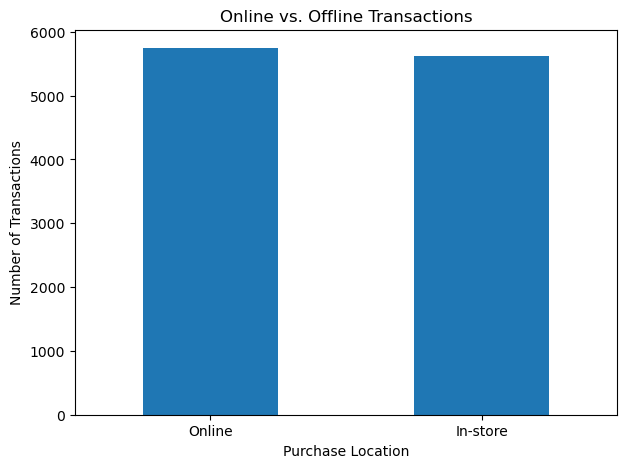

In [413]:
location = df_1['Location'].value_counts()

plt.figure(figsize=(7, 5))


location.plot(kind='bar')
plt.xlabel("Purchase Location")
plt.ylabel("Number of Transactions")
plt.title("Online vs. Offline Transactions")
plt.xticks(rotation=0)
plt.show()

Total Spending By location

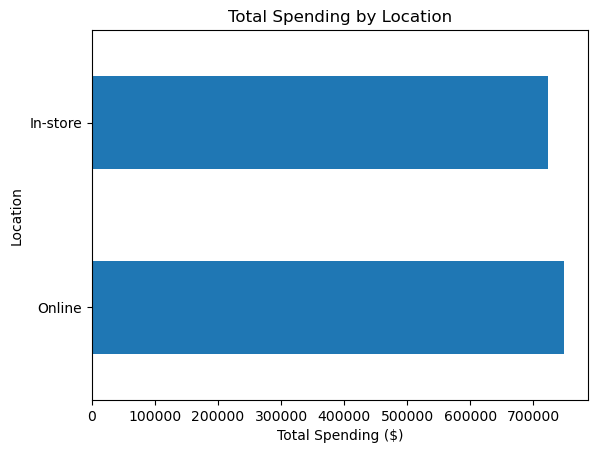

In [414]:
total_spending_by_location = df_1.groupby(['Location'])['Total Spent'].sum().sort_values(ascending=False)

total_spending_by_location.plot(kind='barh')
plt.xlabel("Total Spending ($)")
plt.ylabel("Location")
plt.title("Total Spending by Location")
plt.show()

Transaction distribution over time

<Axes: xlabel='year'>

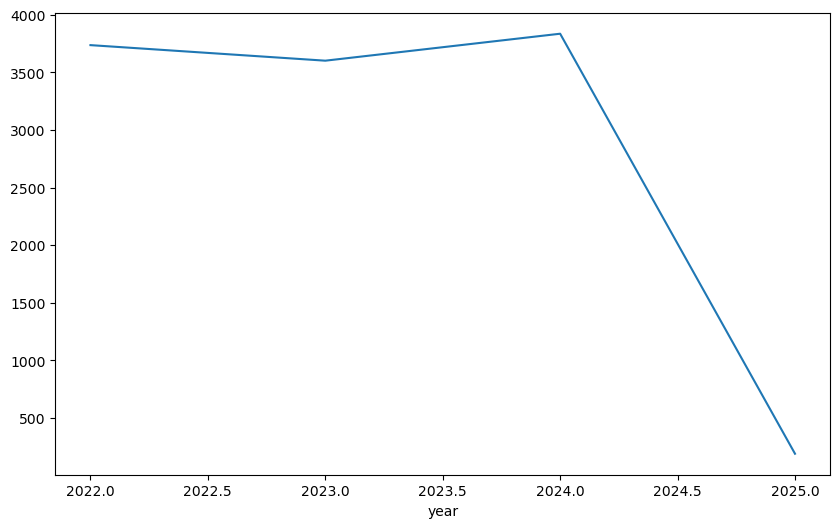

In [430]:
df_1['year'] = df_1['Transaction Date'].dt.year


transaction_overtime = df_1.groupby(['year'])['Transaction ID'].count()
plt.figure(figsize=(10, 6))
transaction_overtime.plot(kind='line')

In [426]:
df_1.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Month
4056,TXN_2070726,CUST_22,Milk Products,Item_6_MILK,12.5,5.0,62.5,Digital Wallet,In-store,2022-01-01,False,1
3493,TXN_1519499,CUST_15,Computers and electric accessories,Item_6_CEA,12.5,6.0,75.0,Credit Card,Online,2022-01-01,False,1
5168,TXN_9364474,CUST_19,Food,Item_22_FOOD,36.5,3.0,109.5,Cash,In-store,2022-01-01,False,1
3327,TXN_6950467,CUST_01,Computers and electric accessories,Item_6_CEA,12.5,6.0,75.0,Digital Wallet,In-store,2022-01-01,True,1
5790,TXN_6329331,CUST_24,Beverages,Item_8_BEV,15.5,5.0,77.5,Credit Card,Online,2022-01-01,True,1
10609,TXN_8529373,CUST_24,Butchers,Item_24_BUT,39.5,6.0,237.0,Credit Card,In-store,2022-01-01,True,1
10832,TXN_3113686,CUST_06,Electric household essentials,Item_21_EHE,35.0,10.0,350.0,Cash,Online,2022-01-01,True,1
12434,TXN_7949162,CUST_11,Furniture,Item_6_FUR,12.5,4.0,50.0,Credit Card,In-store,2022-01-01,False,1
3076,TXN_7331955,CUST_12,Milk Products,Item_4_MILK,9.5,7.0,66.5,Credit Card,Online,2022-01-01,False,1
6058,TXN_2489260,CUST_17,Butchers,Item_20_BUT,33.5,7.0,234.5,Digital Wallet,In-store,2022-01-01,True,1


In [424]:
df_1.tail(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Month
10067,TXN_7826312,CUST_09,Beverages,Item_11_BEV,20.0,8.0,160.0,Cash,In-store,2025-01-17,False,1
3872,TXN_7151664,CUST_15,Computers and electric accessories,Item_20_CEA,33.5,7.0,234.5,Digital Wallet,Online,2025-01-17,False,1
1548,TXN_2596812,CUST_25,Patisserie,Item_2_PAT,6.5,8.0,52.0,Cash,Online,2025-01-17,False,1
2729,TXN_7369318,CUST_01,Beverages,Item_11_BEV,20.0,5.0,100.0,Credit Card,Online,2025-01-18,False,1
9607,TXN_5907338,CUST_25,Beverages,Item_23_BEV,38.0,9.0,342.0,Cash,In-store,2025-01-18,True,1
10463,TXN_1661883,CUST_04,Beverages,Item_17_BEV,29.0,9.0,261.0,Cash,In-store,2025-01-18,False,1
5431,TXN_6383632,CUST_12,Electric household essentials,Item_21_EHE,35.0,2.0,70.0,Cash,In-store,2025-01-18,False,1
3844,TXN_5321918,CUST_24,Furniture,Item_6_FUR,12.5,5.0,62.5,Credit Card,In-store,2025-01-18,False,1
11069,TXN_5709336,CUST_10,Food,Item_4_FOOD,9.5,2.0,19.0,Credit Card,In-store,2025-01-18,True,1
10008,TXN_5804265,CUST_11,Computers and electric accessories,Item_20_CEA,33.5,2.0,67.0,Digital Wallet,Online,2025-01-18,True,1
